This notebook allows you to visualize exploration and exploitation statistics for the Exploration in Malmo Continuous Mountain Cart EMC^2 experiment. make sure your data is in the run_saves/ folder.

In [273]:
from utils.gep_utils import Bounds
import numpy as np
import os
import pylab
import seaborn
import config
import scipy.stats as sp
import pickle
import matplotlib.pyplot as plt
import imageio
from scipy.spatial import distance
from collections import OrderedDict
#import matplotlib
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [274]:
# Step 1 loa data
nb_runs = 8
model_full_names = {'rgb':"Flat Random Goal Babbling", 'rmb':"Random Model Babbling",
                    'amb':"Active Model Babbling", 'sgs': "Single Goal Space",
                    'random':"RANDOM"}
#model_full_names = ["Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
#model_full_names = ["Flat Random Goal Babbling", "Random Model Babbling", "Active Model Babbling"]
#model_filenames = ["emmcnewcodenewint_f_rgb","emmcnewcodenewint_rmb","emmcnewcodenewint_amb"]
titles = {'rgb':'F-RGB', 'rmb':'RMB', 'amb':'AMB',
          'random':'RANDOM', 'sgs':'SGS'}
model_filenames = ["amb_rmb_comp/emmc3dfinal_amb", "amb_rmb_comp/emmc3dfinal_rmb", "emmc3dfinal_sgs",
                  "emmc3d_random", "emmc3d_f_rgb"]
model_filenames = ["emmc3dfinal2_amb","final/emmc3dfinal_rmb"]
#model_filenames = ["final/emmc3d_random"]
#model_filenames = ["emmc10dfinal_rmb","emmc10dfinal_amb"]

#model_filenames = ["random","dist_fmb","dist_rmb","dist_amb"]
nb_models = len(model_filenames)
model_colors = {'random': u'#8c564b', 'sgs': u'#d62728', 'amb': u'#2ca02c', 'rmb': u'#ff7f0e', 'rgb': u'#1f77b4'}
object_colors = {'pickaxe':u'#2ca02c' , 'shovel':u'#ff7f0e' ,
              'agent':u'#1f77b4' ,'cart':u'#9467bd' , 'block':u'#d62728', 'random':'grey' }
object_names = {'pickaxe':'Pickaxe' , 'shovel':'Shovel' ,
              'agent':'Agent' ,'cart':'Cart' , 'block':'Blocks', 'random':'Random' }
#colors = [u'#8c564b', u'#d62728',u'#ff7f0e', u'#1f77b4', u'#2ca02c']

    

saves = OrderedDict()
test_saves = OrderedDict()
gep_saves = {}
stat = OrderedDict()
model_ids = []
for k in model_filenames:
    k = k.split('_')[-1]
    model_ids.append(k)
    saves[k] = []
    test_saves[k] = []
    gep_saves[k] = []
    stat[k] = {}


for filename in model_filenames:
    print(filename)
    for j in range(nb_runs):
        full_filename = "run_saves/"+filename+"_"+str(j)+"_bk.pickle"
        #full_save_name = "run_saves/"+filename+"_"+str(j)+"_save.pickle"
        test_filename = "run_saves/"+filename+"_"+str(j)+"_test.pickle"
        if os.path.isfile(test_filename):
            test_data = pickle.load(open(test_filename,"rb"))
            test_saves[filename.split('_')[-1]].append(test_data)
            print('test loaded')
        else:
            test_saves[filename.split('_')[-1]].append({})
        if  os.path.isfile(full_filename):
            data = pickle.load(open(full_filename,"rb"))
            #gep_data = pickle.load(open(full_save_name,"rb"))
            saves[filename.split('_')[-1]].append(data)
            print(filename.split('_')[-1])
            #gep_saves[filename].append(gep_data[0])
            nb_episodes = len(data['end_agent_x'])
            if nb_episodes != 40000:
                print(full_filename)
            
            print(nb_episodes)
        else:
            print("unknown file: {} using previous one:".format(full_filename))
            saves[filename.split('_')[-1]].append(saves[filename.split('_')[-1]][-1])

emmc3dfinal2_amb
amb
40000
amb
40000
amb
40000
amb
40000
amb
40000
amb
run_saves/emmc3dfinal2_amb_5_bk.pickle
39000
amb
40000
amb
40000
final/emmc3dfinal_rmb
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000
test loaded
rmb
40000


In [ ]:
!ls

In [275]:
def plot_agent_pos_exploration(ax, Xs, Zs,cart_Xs, title):
    b = Bounds()
    b.add('agent_x',[288.3,294.7])
    b.add('agent_z',[433.3,443.7])

    # add arena boundaries 
    points = np.array([[288.3, 433.3],
                       [294.7, 433.3],
                       
                       [294.7,443.3],
                       [294.7,443.7],
                       [288.3,443.7],
                       [288.3,443.3]])

    #upper floor limit
    #ax.plot([293.7, 292.3], [440.7, 440.7], color='k', linestyle=':', linewidth=2)
    #ax.plot([290.7, 289.3], [440.7, 440.7], color='k', linestyle=':', linewidth=2)

    #cart swinged up limit
    #ax.plot([286.8, 286.8], [443, 444], color='g', linestyle='--', linewidth=2)
    #ax.plot([296.2, 296.2], [443, 444], color='g', linestyle='--', linewidth=2)
    
#     for i,(x,y) in enumerate(points):
#         if i == (len(points) - 1):
#             xs = [x,points[0,0]]
#             ys = [y,points[0,1]]
#         else:
#             xs = [x,points[i+1,0]]
#             ys = [y,points[i+1,1]]
#         ax.plot(xs,ys,color='k',linestyle='--', linewidth=2)

    ax.plot(Xs,Zs,'r.',markersize=5, color=object_colors['agent'], label='Agent')
    ax.plot(cart_Xs,[443.5]*len(cart_Xs),'c.',markersize=3, color=object_colors['cart'])
    #dumb point for legend
    ax.plot([1000],[443.5],'c.',markersize=5, color=object_colors['cart'], label='Cart')
    
    ax.set_xlim(xmin=286.5,xmax=296.2)
    ax.set_ylim(ymin=431,ymax=444)

    ax.invert_xaxis()
    #ax.axis('equal')
    ax.axis('off')
    if title: 
        ax.set_title(title, fontsize=22)   

active_modular


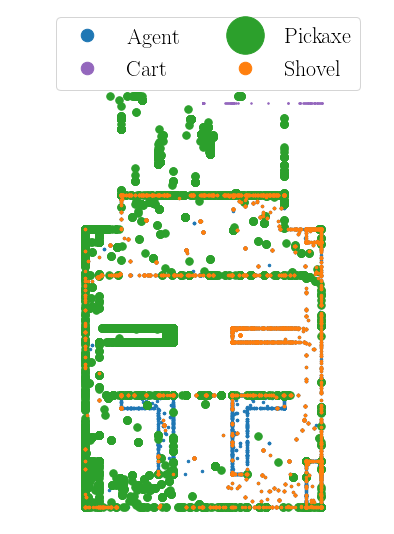

active_modular


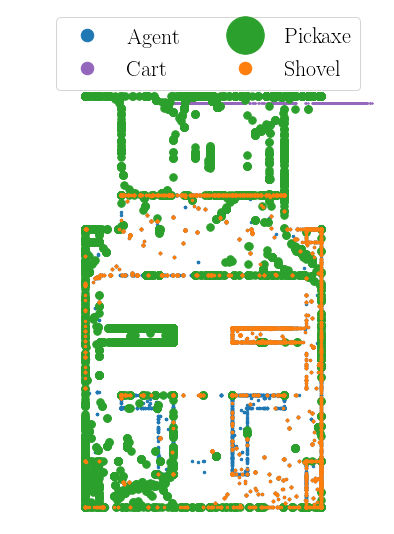

active_modular


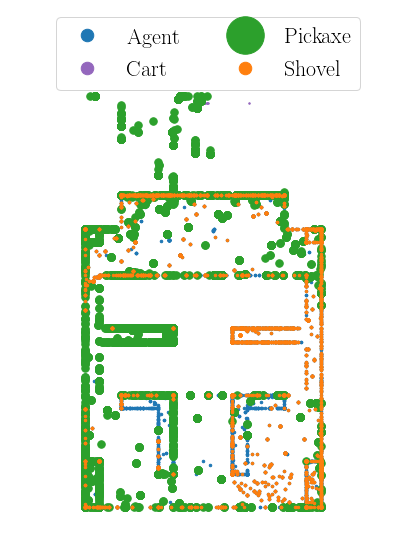

active_modular


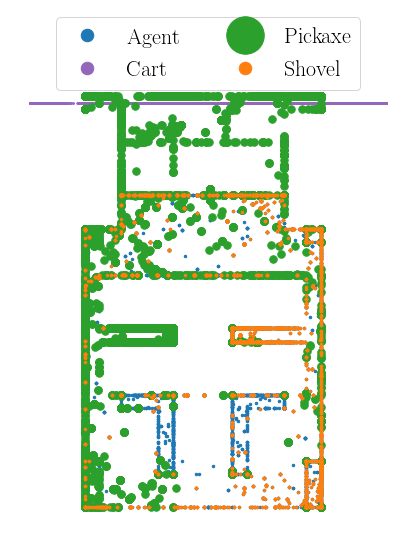

active_modular


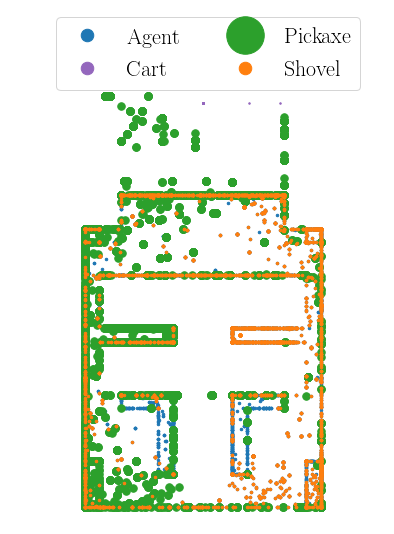

active_modular


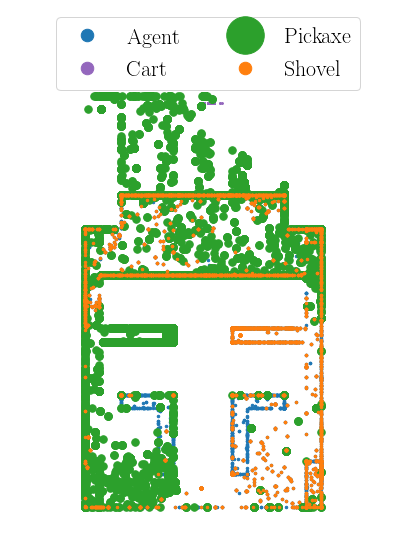

active_modular


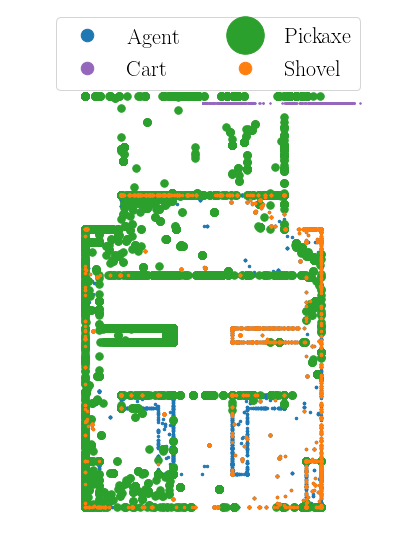

active_modular


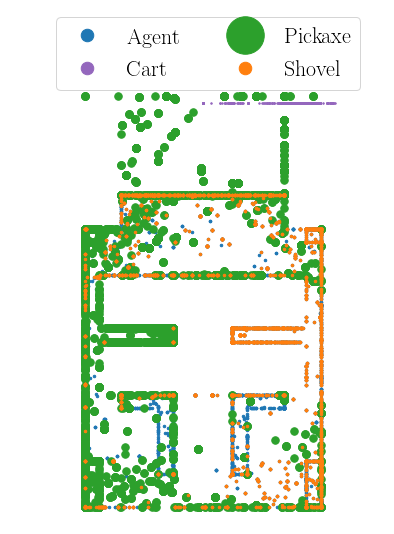

active_modular


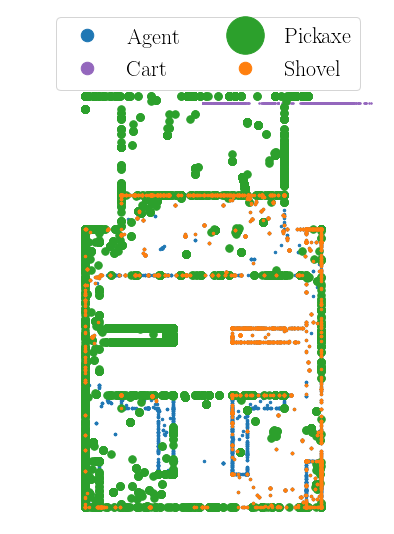

active_modular


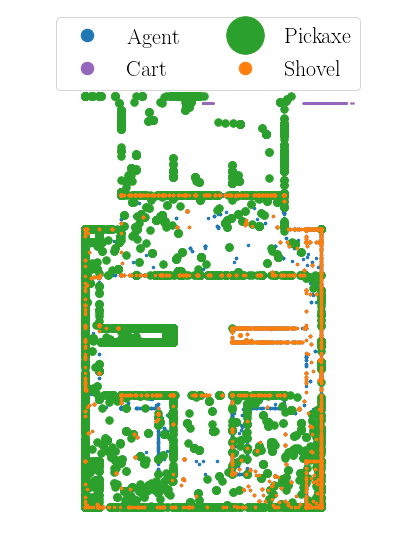

active_modular


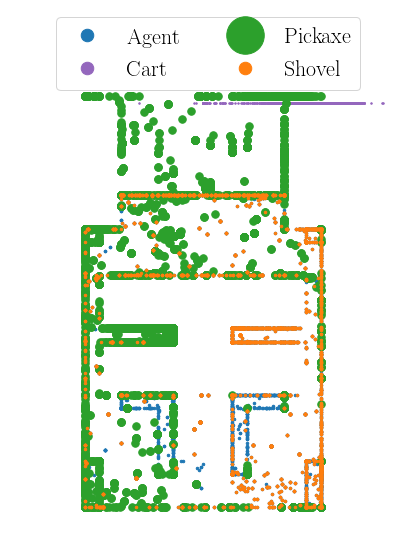

active_modular


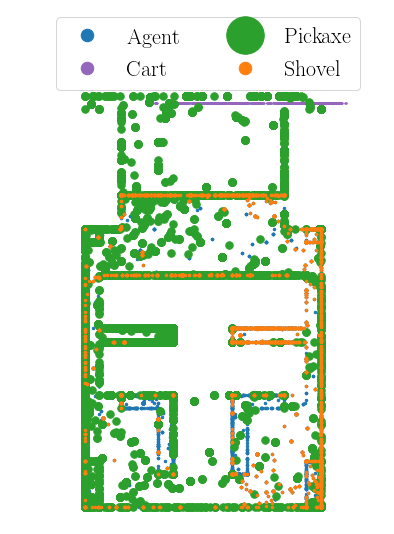

active_modular


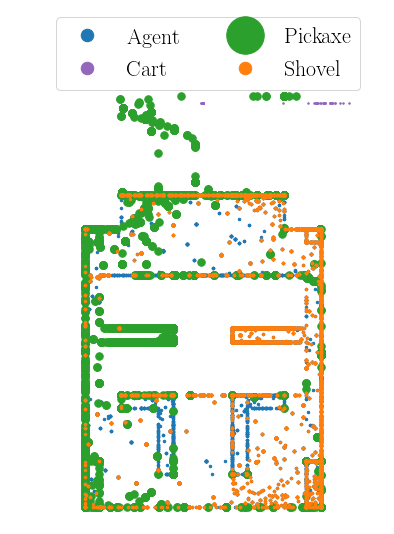

active_modular


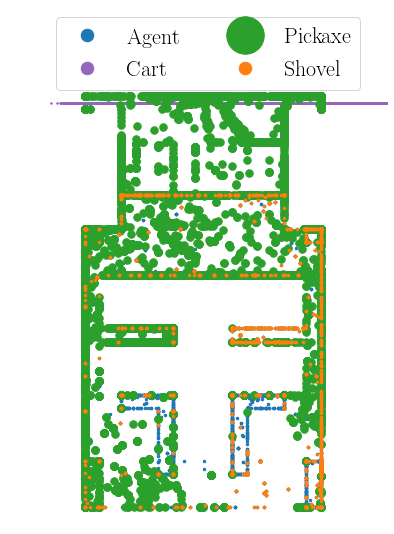

active_modular


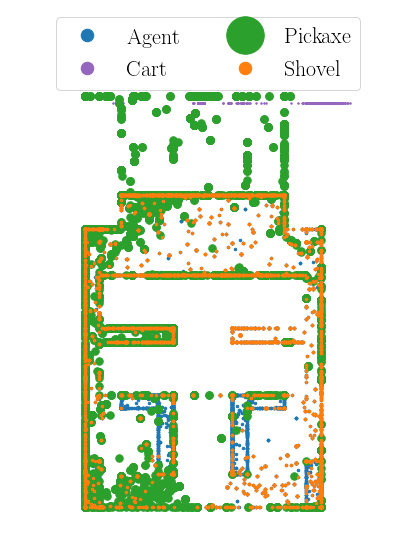

active_modular


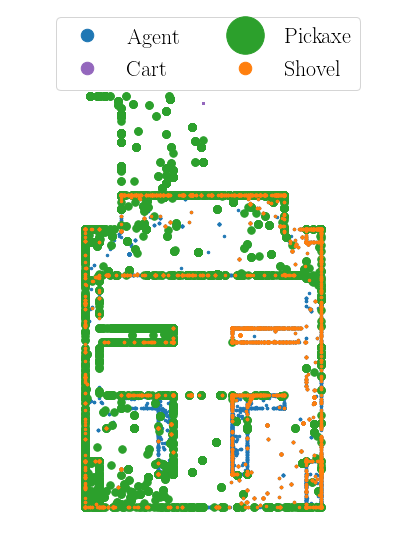

active_modular


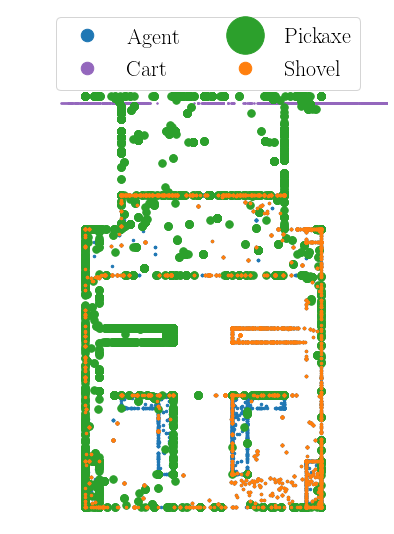

active_modular


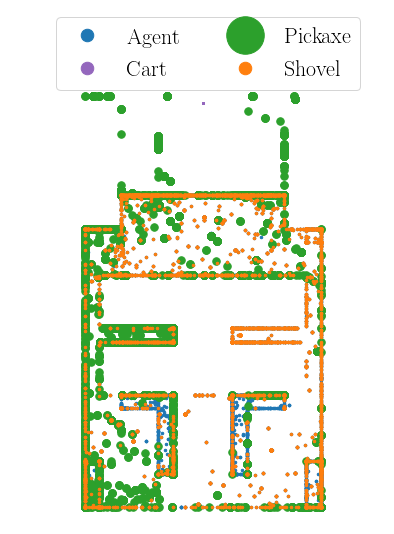

active_modular


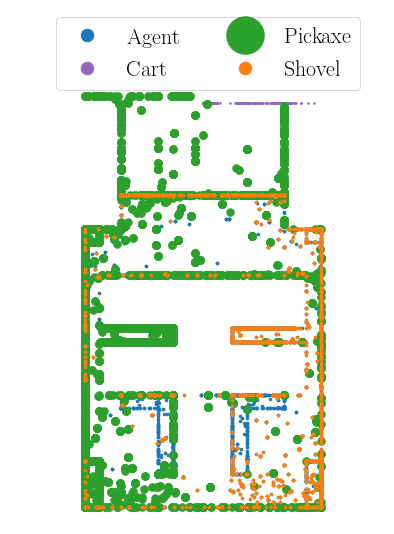

active_modular


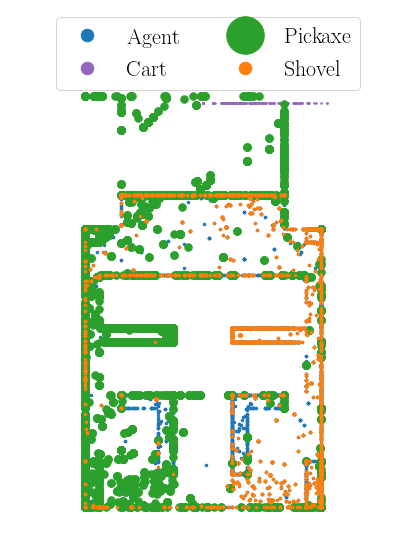

active_modular


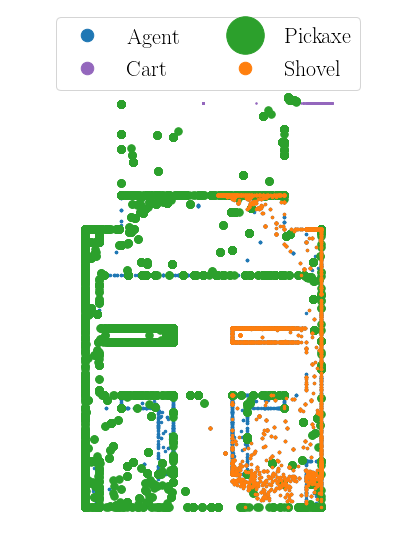

active_modular


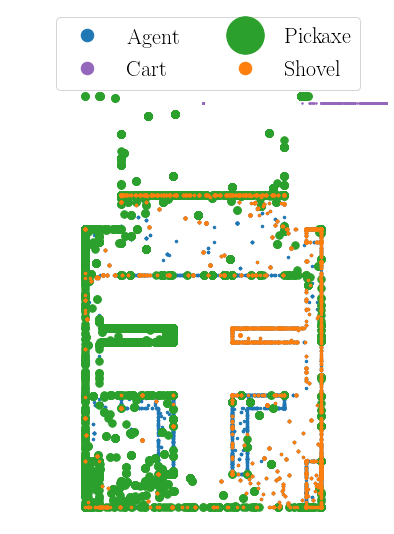

active_modular


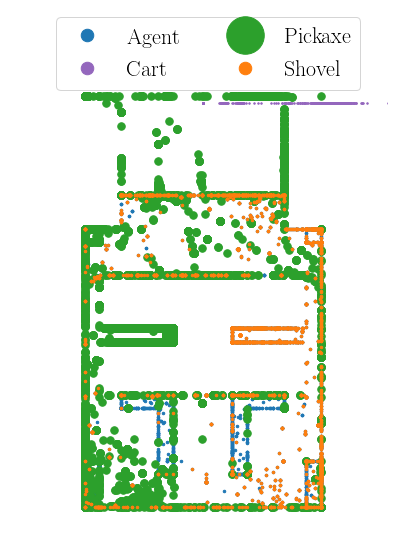

active_modular


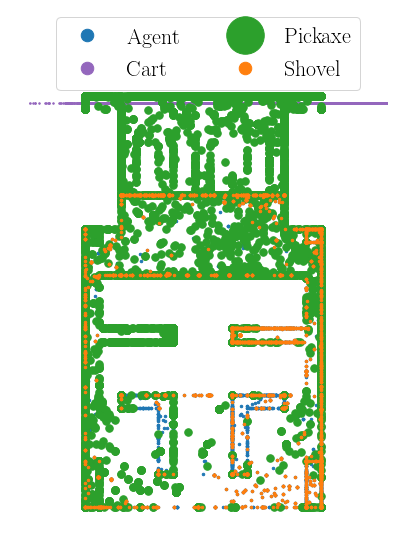

active_modular


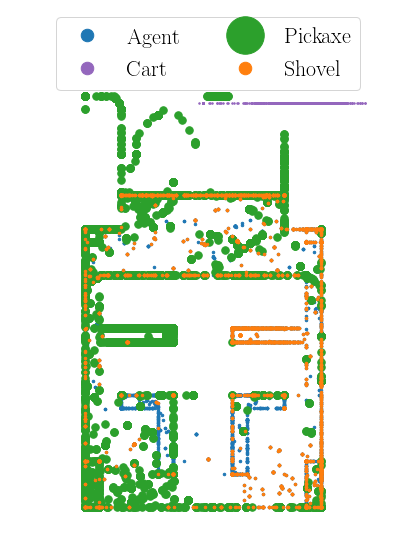

active_modular


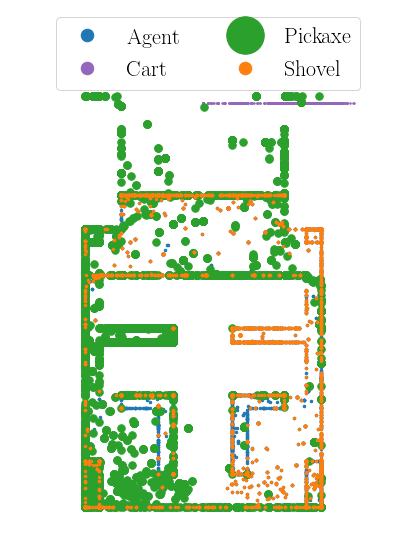

active_modular


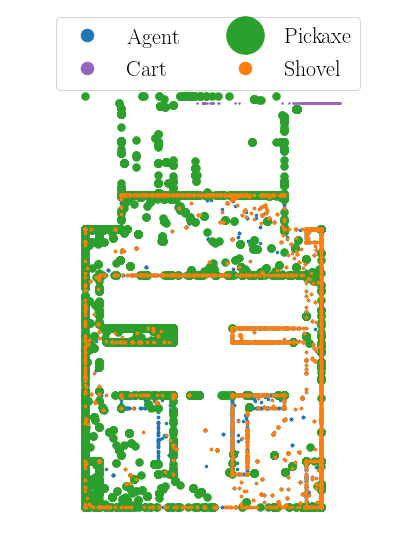

In [252]:
# Compact Visu
def one_explo_maps(max_episodes=nb_episodes, run_nb=0, model_name='random', legend=False):
    f, ax = plt.subplots(1,1,figsize=(5,7))
    b_k = saves[model_name][run_nb]
    print(b_k['parameters']['model_type'])
    plot_agent_pos_exploration(ax, b_k['end_agent_x'][:max_episodes],
                                b_k['end_agent_z'][:max_episodes],
                                b_k['end_cart_x'][:max_episodes], False)
    ax.plot(b_k['end_pickaxe_x'][:max_episodes],
            b_k['end_pickaxe_z'][:max_episodes],'g.',markersize=15, color=object_colors['pickaxe'],label='Pickaxe')
    ax.plot(b_k['end_shovel_x'][:max_episodes],
            b_k['end_shovel_z'][:max_episodes],'b.',markersize=5, color=object_colors['shovel'], label='Shovel')
    plt.tight_layout(pad=-1.0)
    if legend:
        ax.set_ylim(ymin=431.2,ymax=446.4)
        leg = ax.legend(loc='upper center',fontsize=22, ncol=2, markerscale=5.)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    
    
for i in range(nb_runs):
    one_explo_maps(max_episodes=40000, run_nb=i, legend=True, model_name='amb')
    #plt.savefig("graphics/amb_exploration_map.png", bbox_inches='tight')
    plt.show()

active_modular
40000
3105
random_modular
40000
909


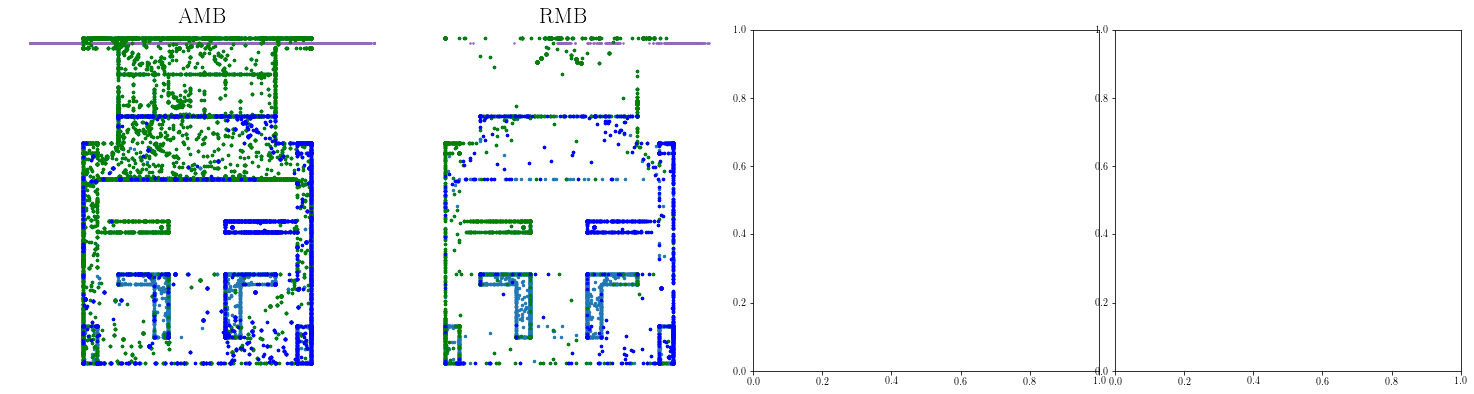

active_modular
40000
1015
random_modular
40000
627


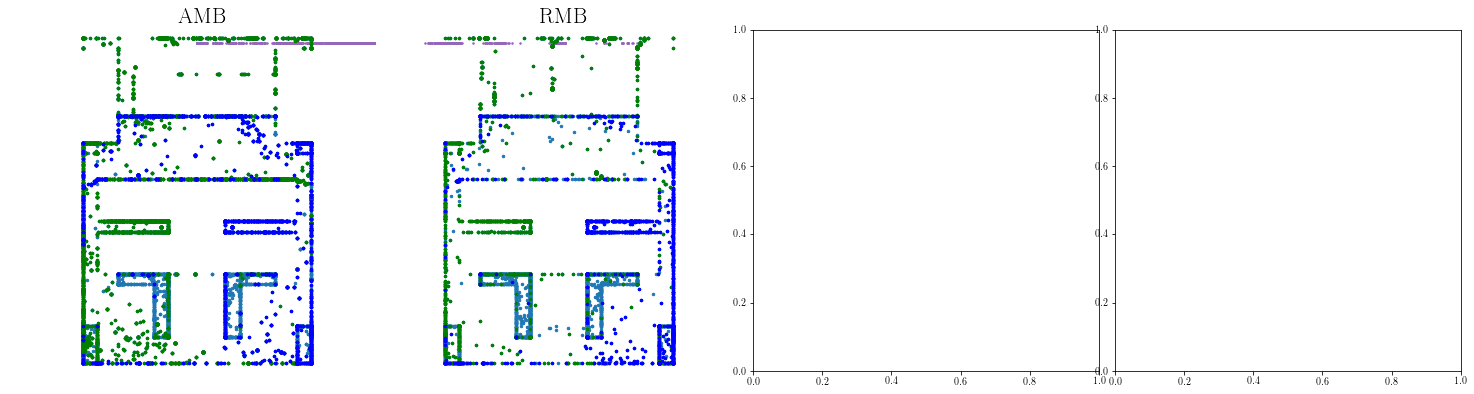

active_modular
40000
1636
random_modular
40000
1767


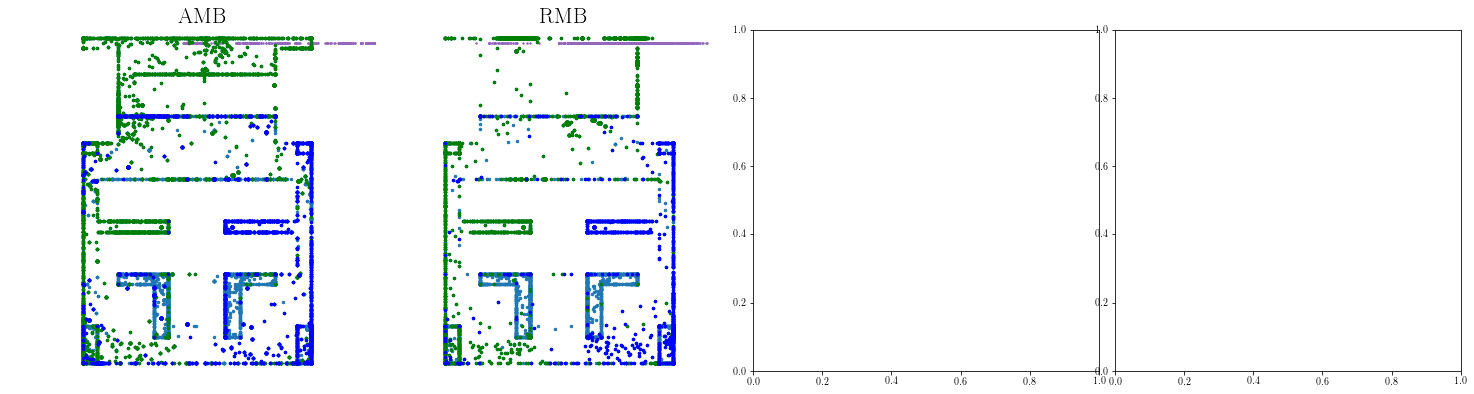

active_modular
40000
805
random_modular
40000
1436


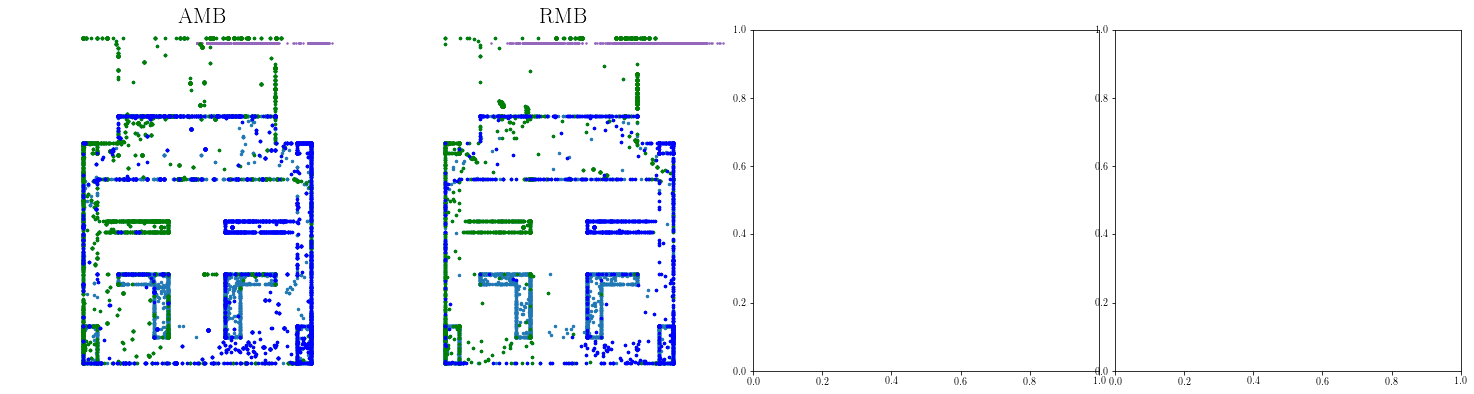

active_modular
40000
23
random_modular
40000
1


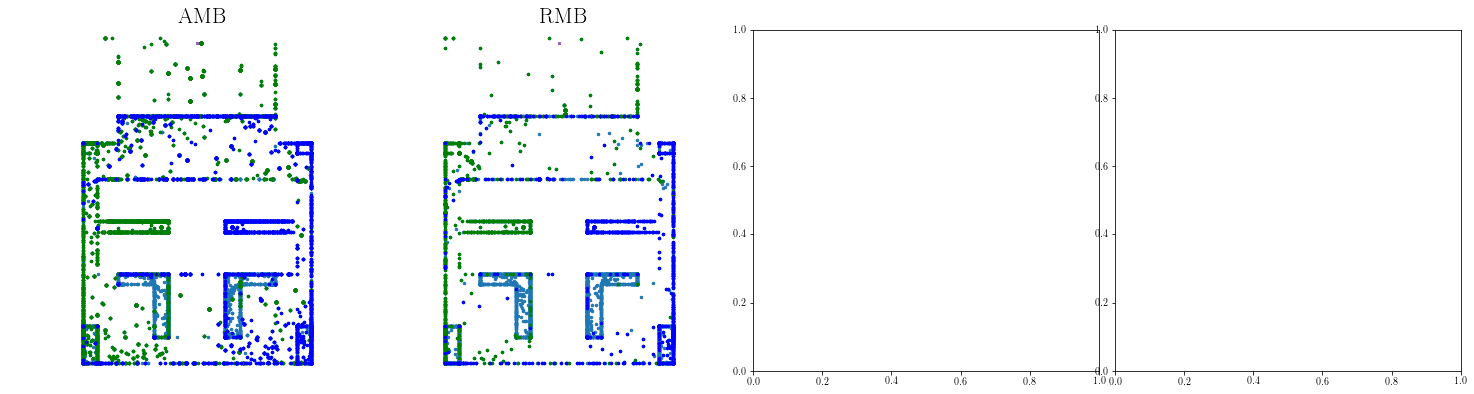

active_modular
39000
2767
random_modular
40000
1


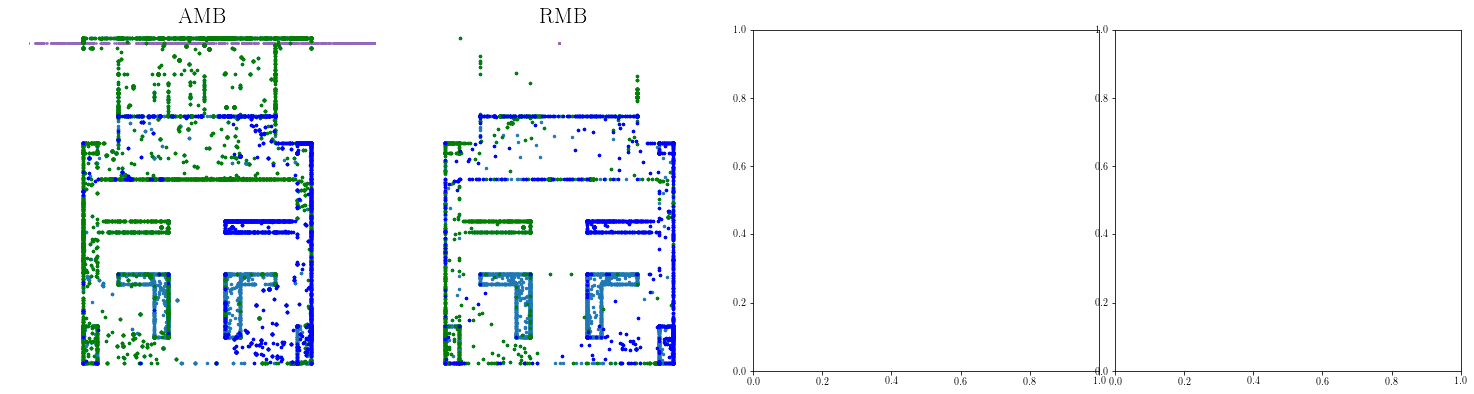

active_modular
40000
679
random_modular
40000
1


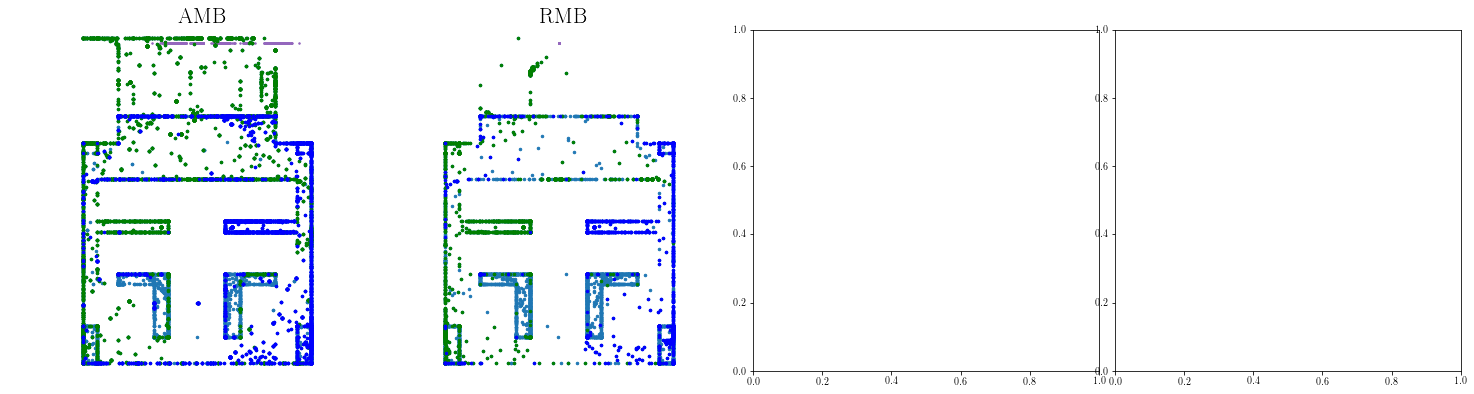

active_modular
40000
4324
random_modular
40000
1


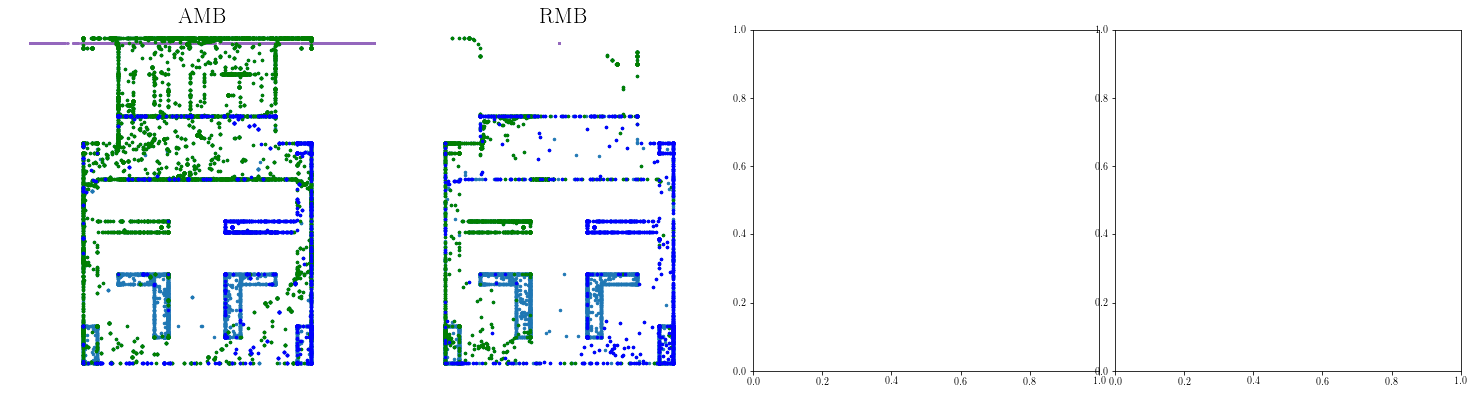

In [276]:
# Compact Visu
def compact_explo_maps(max_episodes=None, run_nb=0, legend=False):
    f, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(20,5))
    ax = (ax0, ax1, ax2, ax3)
    for i, (m_name, m_id) in enumerate(zip(model_full_names,model_ids)):
        b_k = saves[m_id][run_nb]
        print(b_k['parameters']['model_type'])
        plot_agent_pos_exploration(ax[i], b_k['end_agent_x'][:max_episodes],
                                    b_k['end_agent_z'][:max_episodes],
                                    b_k['end_cart_x'][:max_episodes], titles[m_id])
        ax[i].plot(b_k['end_pickaxe_x'][:max_episodes],
                   b_k['end_pickaxe_z'][:max_episodes],'g.',markersize=5,label='pickaxe')
        ax[i].plot(b_k['end_shovel_x'][:max_episodes],
                   b_k['end_shovel_z'][:max_episodes],'b.',markersize=5,label='shovel')
        print(len(b_k['end_shovel_x'][:max_episodes]))
    #add pickaxe and shovel positions
        print(len(np.unique(b_k['end_cart_x'])))
    plt.tight_layout(pad=-1.0)
        

for i in range(nb_runs):
    compact_explo_maps(max_episodes=40000, run_nb=i, legend=True)
    #plt.savefig("aa_newold_final2", bbox_inches='tight')
    plt.show()

In [ ]:
# # GIF out of compact vizu
# step_size = 1000
# nb_steps = int(nb_episodes / step_size)
# filenames = []
# for i,max_episodes in enumerate(np.arange(step_size,nb_episodes+step_size,step_size)):
#     print(i)
#     compact_explo_maps(max_episodes)
#     f_name = "graphics/exploration_coverage_{}.png".format(i)
#     plt.savefig(f_name, bbox_inches='tight')
#     filenames.append(f_name)

# import imageio
# images = []
# for filename in filenames:
#     images.append(imageio.imread(filename))
# imageio.mimsave('graphics/exploration.gif', images, duration=0.3)

# GIF out of compact vizu
def explo_gif(run_nb=0):
    print("Making an exploration GIF for run nb {}".format(run_nb))
    step_size = 1000
    nb_steps = int(30000 / step_size)
    filenames = []
    for i,max_episodes in enumerate(np.arange(step_size,nb_episodes+step_size,step_size)):
        #print(i)
        compact_explo_maps(max_episodes,run_nb)
        f_name = "graphics/exploration_coverage_{}.png".format(i)
        plt.savefig(f_name, bbox_inches='tight')
        filenames.append(f_name)
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('graphics/exploration{}.gif'.format(run_nb), images, duration=0.3)
for i in range(nb_runs):
    explo_gif(i)


![](graphics/exploration0.gif)
![](graphics/exploration1.gif)


In [277]:
def get_nb_cells(x,y,nb_bins,rng):
    if y is not None: #2D case
        bin_numbers = sp.binned_statistic_2d(x, y, None, 'count',
                                                bins=nb_bins, range=rng).binnumber
    else: #1D case
        bin_numbers = sp.binned_statistic(x, None, 'count',
                                             bins=nb_bins, range=rng).binnumber
    return len(np.unique(bin_numbers))

# get env specific bounds
b = config.get_env_bounds('emmc_env')
nb_2d_cells = [10,30]
total_2d_cells = nb_2d_cells[0] * nb_2d_cells[1]
nb_c_cells = 200
nb_b_cells = 2**5

# Grid cell visualization
for m_id in model_ids:
    stat[m_id]['agent_cells'] = []
    stat[m_id]['pickaxe_cells'] = []
    stat[m_id]['shovel_cells'] = []
    stat[m_id]['cart_cells'] = []
    stat[m_id]['nb_cart_touched'] = []
    stat[m_id]['nb_pickaxe_touched'] = []
    stat[m_id]['nb_shovel_touched'] = []
    stat[m_id]['b_combinations'] = []
    stat[m_id]['first_blocks'] = []
    stat[m_id]['first_swing_left'] = []
    stat[m_id]['first_swing_right'] = []
    stat[m_id]['first_cart_touched'] = []
    stat[m_id]['eval_cart_touched'] = []
    stat[m_id]['chosen_modules'] = []
def mean_std(data_name):
    mean = round(np.mean(stat[m_id][data_name]),3)
    std = round(np.std(stat[m_id][data_name]),3)
    return mean,std

name_2d_spaces = ['agent', 'pickaxe', 'shovel']
for m_name, m_id in zip(model_full_names,model_ids):
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        
        # grid cell for 2d outcome spaces (agent, pickaxe, shovel)
        for outc_space in name_2d_spaces:
            #print(outc_space+'_x')
            name = 'end_{}'.format(outc_space)
            bnd_x = b.get_bounds([outc_space+'_x'])
            bnd_z = b.get_bounds([outc_space+'_z'])
            bnds = bnd_x + bnd_z
            #print(bnds)
            nb_expl_cells = get_nb_cells(b_k[name+'_x'], b_k[name+'_z'],
                                         nb_2d_cells, bnds)
            stat[m_id][outc_space+'_cells'].append((nb_expl_cells/total_2d_cells)*100)
        
        #cart grid cell
        c_Xs = b_k['end_cart_x']
        nb_expl_cells = get_nb_cells(c_Xs, None,
                                     nb_c_cells, b.get_bounds(['cart_x']))
        stat[m_id]['cart_cells'].append((nb_expl_cells/nb_c_cells)*100)
        stat[m_id]['nb_cart_touched'].append(len(np.unique(b_k['end_cart_x'])))
        stat[m_id]['nb_pickaxe_touched'].append(len(np.unique(b_k['end_pickaxe_x'])))
        stat[m_id]['nb_shovel_touched'].append(len(np.unique(b_k['end_shovel_x'])))
        
        # first swing or touched car info
        try:
            first_cart_touched = next(x[0] for x in enumerate(c_Xs) if x[1] != 291.5)
        except StopIteration:
            first_cart_touched = 'never'
        # check for cart swing up
        try:
            first_swing_left = next(x[0] for x in enumerate(c_Xs) if x[1] > 296.2)
        except StopIteration:
            first_swing_left = 'never'
        try:
            first_swing_right = next(x[0] for x in enumerate(c_Xs) if x[1] < 286.8)
        except StopIteration:
            first_swing_right = 'never'
        
        #blocks
        b_vec = [b_k['end_block_0'], b_k['end_block_1'], b_k['end_block_2'],
                 b_k['end_block_3'], b_k['end_block_4']]
        b_vec = np.array(b_vec).reshape(-1,5)
        stat[m_id]['b_combinations'].append(len(np.unique(b_vec, axis=0)))
        #print(np.unique(b_vec, axis=0))
        
        stat[m_id]['first_swing_left'].append(first_swing_left) 
        stat[m_id]['first_swing_right'].append(first_swing_right)
        stat[m_id]['first_cart_touched'].append(first_cart_touched)
        
print('--- EXPLORATION ---')
exploration_metrics = ['agent_cells', 'cart_cells', 'b_combinations',
                       'first_cart_touched', 'nb_cart_touched', 'nb_pickaxe_touched', 'nb_shovel_touched', 'first_swing_left', 'first_swing_right']

for m_id in model_ids:
    m_name = model_full_names[m_id]
    print("### " + m_name + " ####")
    
    for i in range(nb_runs):
        
        b_k = saves[m_id][i]
        a = np.array(b_k['choosen_modules'])
        unique, counts = np.unique(a, return_counts=True)
        #print dict(zip(unique, counts))
    
    for metric in exploration_metrics:
        values = stat[m_id][metric]
        if not 'first' in metric:
            mean,std = mean_std(metric)
            values = [round(v,1) for v in values]
            print(metric + ':' + '%s, MEAN: %s, STD: %s' % (values, mean, std))
        else:
            print(metric + ':' + '%s' % (values))

#     for i in range(6):
#         first_found = []
#         nb_found = []
#         for j in range(nb_runs):
#             first_found.append(stat[m_id]['first_breads'][j][i][0])
#             nb_found.append(stat[m_id]['first_breads'][j][i][1])
#         print('bread %s:' % i)
#         print("first found: %s" % first_found)
#         print("nb_found: %s" % nb_found)   


--- EXPLORATION ---
### Active Model Babbling ####
agent_cells:[78.3, 66.0, 70.0, 63.3, 65.7, 73.7, 70.7, 75.7], MEAN: 70.417, STD: 4.915
cart_cells:[84.0, 39.5, 36.0, 28.5, 2.0, 77.0, 27.5, 82.5], MEAN: 47.125, STD: 28.403
b_combinations:[32, 31, 32, 28, 21, 32, 29, 32], MEAN: 29.625, STD: 3.569
first_cart_touched:[795, 8868, 10096, 5039, 22869, 4625, 7135, 1504]
nb_cart_touched:[3105, 1015, 1636, 805, 23, 2767, 679, 4324], MEAN: 1794.25, STD: 1371.857
nb_pickaxe_touched:[6012, 2434, 1927, 1132, 1322, 3199, 1857, 4474], MEAN: 2794.625, STD: 1582.333
nb_shovel_touched:[905, 684, 712, 1028, 1069, 805, 1350, 470], MEAN: 877.875, STD: 254.823
first_swing_left:[2034, 'never', 'never', 'never', 'never', 36821, 'never', 20755]
first_swing_right:[5807, 10219, 10096, 'never', 'never', 7233, 'never', 11460]
### Random Model Babbling ####
agent_cells:[57.0, 61.3, 60.7, 60.0, 56.0, 54.3, 55.0, 53.0], MEAN: 57.167, STD: 2.939
cart_cells:[28.0, 25.5, 45.0, 48.0, 0.5, 0.5, 0.5, 0.5], MEAN: 18.562, S

In [278]:
# Grid cell exploration curves
step_size = 2000
nb_steps = int(nb_episodes / step_size)
print('ploting using {} steps'.format(nb_steps))
all_a_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_p_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_s_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_c_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
all_b_explo = np.zeros((nb_models,nb_runs,nb_steps+1))
name_2d_spaces = ['agent', 'pickaxe', 'shovel']
for m_nb,m_id in enumerate(saves.keys()):
    print(m_id)
    for i in range(nb_runs):
        b_k = saves[m_id][i]
        a_explo = [0.]
        p_explo = [0.]
        s_explo = [0.]
        c_explo = [0.]
        b_explo = [0.]
        for max_episodes in np.arange(step_size,nb_episodes+step_size,step_size):
            
            for outc_space in name_2d_spaces:
                #print(outc_space+'_x')
                name = 'end_{}'.format(outc_space)
                bnd_x = b.get_bounds([outc_space+'_x'])
                bnd_z = b.get_bounds([outc_space+'_z'])
                bnds = bnd_x + bnd_z
                Xs = b_k[name+'_x'][:max_episodes]
                Zs = b_k[name+'_z'][:max_episodes]
                expl_cells = get_nb_cells(Xs, Zs, nb_2d_cells, bnds)
                if outc_space == 'agent':
                    a_expl_cells = expl_cells
                elif outc_space == 'pickaxe':
                    p_expl_cells = expl_cells
                elif outc_space == 'shovel':
                    s_expl_cells = expl_cells
        
            #cart grid cell
            c_Xs = b_k['end_cart_x'][:max_episodes]
            c_expl_cells = get_nb_cells(c_Xs, None,
                                         nb_c_cells, b.get_bounds(['cart_x']))
            
            
            a_explo.append((a_expl_cells/total_2d_cells)*100)
            s_explo.append((s_expl_cells/total_2d_cells)*100)
            p_explo.append((p_expl_cells/total_2d_cells)*100)
            
            c_explo.append((c_expl_cells/nb_c_cells)*100)
            
            #blocks
            b_vec = [b_k['end_block_0'][:max_episodes],
                     b_k['end_block_1'][:max_episodes],
                     b_k['end_block_2'][:max_episodes],
                     b_k['end_block_3'][:max_episodes],
                     b_k['end_block_4'][:max_episodes]]
            b_vec = np.array(b_vec).reshape(-1,5)
            b_explored_combs = len(np.unique(b_vec, axis=0))
            b_explo.append((b_explored_combs/nb_b_cells)*100)
        all_a_explo[m_nb,i,:] = a_explo
        all_p_explo[m_nb,i,:] = p_explo
        all_s_explo[m_nb,i,:] = s_explo
        all_c_explo[m_nb,i,:] = c_explo
        all_b_explo[m_nb,i,:] = b_explo
        
#print np.sum(all_a_explo,axis=1).shape
#print np.mean(np.sum(all_a_explo,axis=1),axis=0).shape
#break
colors = ['red','blue','green','magenta','black','cyan','orange']
mean_a_explo = np.mean(all_a_explo,axis=1)
mean_p_explo = np.mean(all_p_explo,axis=1)
mean_s_explo = np.mean(all_s_explo,axis=1)
mean_b_explo = np.mean(all_b_explo,axis=1)
mean_c_explo = np.mean(all_c_explo,axis=1)

std_a_explo = np.std(all_a_explo,axis=1)
std_p_explo = np.std(all_p_explo,axis=1)
std_s_explo = np.std(all_s_explo,axis=1)
std_b_explo = np.std(all_b_explo,axis=1)
std_c_explo = np.std(all_c_explo,axis=1)

ploting using 20 steps
amb
rmb


In [279]:
def plot_with_std(subplot_nb, ax,x,y,err,color,shade_color,label,
                  y_min=None,y_max=None, legend=False, title=None):
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.plot(x,y, color=color, label=label,linewidth=1.5)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    if legend and subplot_nb==0:
        leg = ax.legend(loc='bottom right', fontsize=16)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.set_xlabel('iterations', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('Exploration %', fontsize=18)
    ax.set_xlim(xmin=min(x),xmax=max(x))
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    if title:
        ax.set_title(title, fontsize=22)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label,
                         y_min=None,y_max=None, legend=False, title=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    #plot all
    added_legend = False
#     ys = [y.tolist() for y in ys]
#     ys.sort(key=lambda x: x[-1])
#     for k,y in enumerate(ys):
#         if added_legend:
#             label = None
#         else:
#             added_legend = True
#         if k == int(nb_runs/2):
#             linewidth = 4
#         else:
#             linewidth = 0.3
#         ax.plot(x,y, color=color, label=label,linewidth=linewidth)
    #print(len(ys))
    median = np.median(ys,axis=0)
    for k,y in enumerate(ys):
        if added_legend:
            label = None
        else:
            added_legend = True
        ax.plot(x,y, color=color, label=label,linewidth=0.3)
    ax.plot(x,median, color=color, label=label,linewidth=4)
    if legend and subplot_nb==0:
        leg = ax.legend(loc='bottom right', fontsize=16)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.set_xlabel('iterations', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('Exploration %', fontsize=18)
    ax.set_xlim(xmin=min(x),xmax=max(x))
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    if title:
        ax.set_title(title, fontsize=22)
        

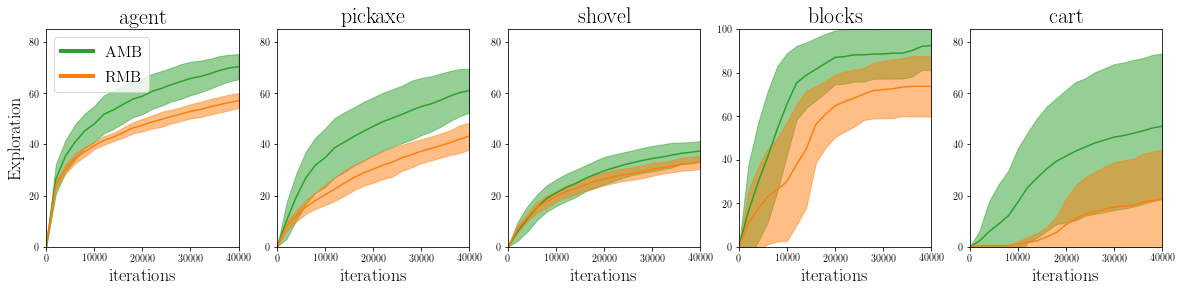

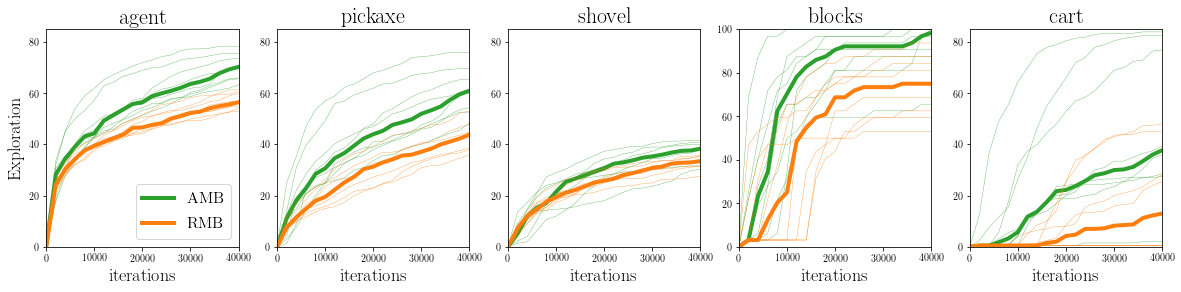

odict_keys(['amb', 'rmb'])
agent
amb
66,70,74
rmb
55,56,60
welch Ttest_indResult(statistic=6.121208484387473, pvalue=6.350395630238731e-05)
pickaxe
amb
54,61,66
rmb
38,44,46
welch Ttest_indResult(statistic=4.648120112360615, pvalue=0.0006148621847200683)
shovel
amb
36,38,40
rmb
32,34,35
welch Ttest_indResult(statistic=2.4808863402534667, pvalue=0.028437125227231685)
blocks
amb
90,98,100
rmb
62,75,85
welch Ttest_indResult(statistic=2.785912588527203, pvalue=0.01509720155921191)
cart
amb
28,38,78
rmb
0,13,32
welch Ttest_indResult(statistic=2.1973947494319517, pvalue=0.047739075197408054)


In [280]:
metrics_mean_explo = [mean_a_explo, mean_p_explo, mean_s_explo, mean_b_explo, mean_c_explo] 
metrics_std_explo = [std_a_explo, std_p_explo, std_s_explo, std_b_explo, std_c_explo]
plot_steps = np.arange(0,nb_episodes+step_size,step_size)
#colors = ['red','blue','green','magenta','black','cyan','orange']
#shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
title_info = ["agent", "pickaxe", "shovel", "blocks", "cart"]
model_names = titles
metric = ["agent","pickaxe","shovel","blocks","cart"]
maxes=[85,85,85,100,85]

# Averaged plots
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
ax = (ax0, ax1, ax2, ax3, ax4)
for j, (models_mean_explo, models_std_explo) in enumerate(zip(metrics_mean_explo, metrics_std_explo)):
    for i,(model_id, mean_explo, std_explo) in enumerate(zip(saves.keys(), models_mean_explo, models_std_explo)):
        #print(model_id)
        y = mean_explo
        err = std_explo
        title = ''
        plot_with_std(j, ax[j], plot_steps,y,err,model_colors[model_id],model_colors[model_id],model_names[model_id],
                      y_min=0,y_max=maxes[j], title=title+title_info[j], legend=True)
        
#plt.savefig("graphics/grid_cell_exploration_mmc.pdf", bbox_inches='tight')
#plt.savefig("grid_cell_exploration_samebt.png", bbox_inches='tight')
plt.show()

#PLOT ALL + MEDIAN
all_explo = [all_a_explo, all_p_explo, all_s_explo, all_b_explo, all_c_explo]
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5,figsize=(20,4))
ax = (ax0, ax1, ax2, ax3, ax4)
for j, models_all_explo in enumerate(all_explo):
    for i, (model_id, explo) in enumerate(zip(saves.keys(),models_all_explo)):
        #print(model_id)
        ys = explo
        title = ''
        plot_all_and_median(j, ax[j], plot_steps,ys,model_colors[model_id],model_names[model_id],
                            y_min=0,y_max=maxes[j], title=title+title_info[j],
                            legend=True)
plt.show()
#plt.savefig("graphics/grid_cell_exploration_mmc.png", bbox_inches='tight')

#WELCH WELCH LES AMIS
print(saves.keys())
for j, (space_name, models_all_explo) in enumerate(zip(metric, all_explo)): #for each goal space
    #print(j)
    print(space_name)
    final_explos = dict()
    for i, (model_id, explo) in enumerate(zip(saves.keys(),models_all_explo)): #for each algo
        final_explos[model_id] = []
        #print(len(explo))
        for run_explo in explo:
            final_explos[model_id].append(run_explo[-1])
        
        #stats
        print(model_id)
        print("{},{},{}".format(int(round(np.percentile(final_explos[model_id],25))),
                               int(round(np.percentile(final_explos[model_id],50))),
                               int(round(np.percentile(final_explos[model_id],75)))))
    
    print('welch {}'.format(ss.ttest_ind(final_explos['amb'], final_explos['rmb'], equal_var=False)))

In [ ]:
def plot_with_std(x,y,err,color,shade_color,label,y_min,y_max):
    plt.plot(x,y, color=color, label=label,linewidth=1.5)
    plt.fill_between(x,y-err,y+err,color=shade_color,alpha=0.5)
    leg = plt.legend(loc='lower right')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
    plt.xlabel('episodes')
    plt.ylabel('exploration %')
    if y_min is not None:
        plt.ylim(ymin=y_min,ymax=y_max)
    

labels = ['RND','F-RGB','RMB','AMB']
shades_colors = ['lightsalmon','skyblue','lightgreen','violet']
print("agent exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_a_explo[i,-1])
    y = mean_a_explo[i,:]
    err = std_a_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("shovel exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_s_explo[i,-1])
    y = mean_s_explo[i,:]
    err = std_s_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("pickaxe exploration")
x = np.arange(0,nb_episodes+step_size,step_size)
for i in range(nb_models):
    print(std_p_explo[i,-1])
    y = mean_p_explo[i,:]
    err = std_p_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_agent_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("cart")
for i in range(nb_models):
    print(std_c_explo[i,-1])
    y = mean_c_explo[i,:]
    err = std_c_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_cart_pos_expl.pdf", bbox_inches='tight')
plt.show()

print("blocks")
for i in range(nb_models):
    y = mean_b_explo[i,:]
    err = std_b_explo[i,:]
    plot_with_std(x,y,err,colors[i],shades_colors[i],labels[i],0,100)
#plt.savefig("dist_bread_pos_expl.pdf", bbox_inches='tight')
plt.show()
#plt.plot(mean_a_explo, color='red', label=m_name.replace('_',' '))
#plt.plot(mean_c_explo, color='blue', label=m_name.replace('_',' '))
#plt.plot(mean_b_explo, color='green', label=m_name.replace('_',' '))
        

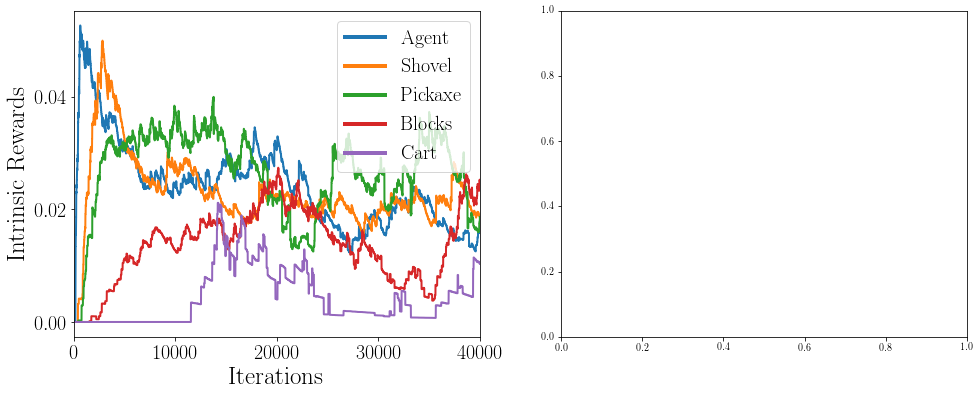

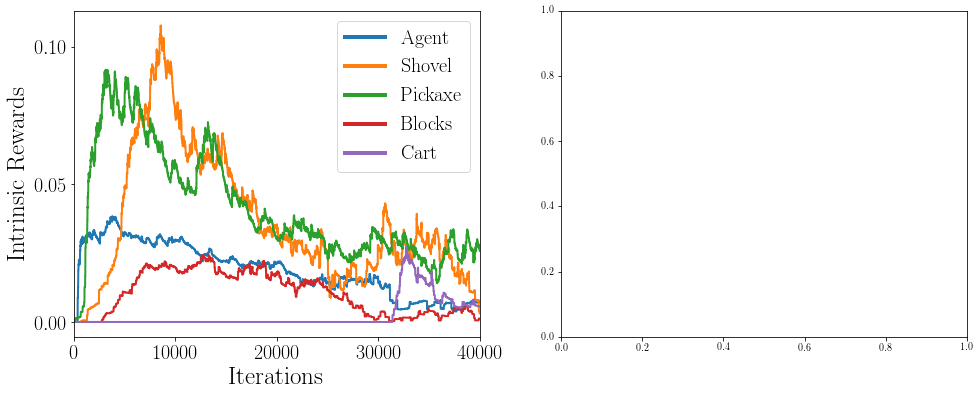

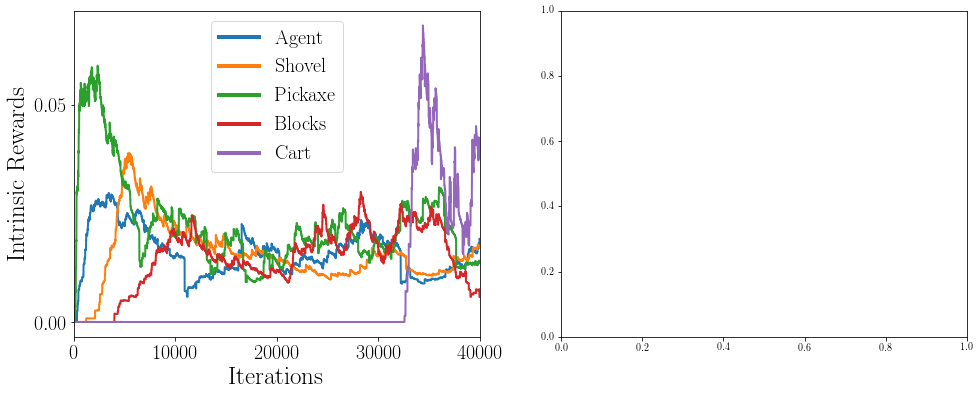

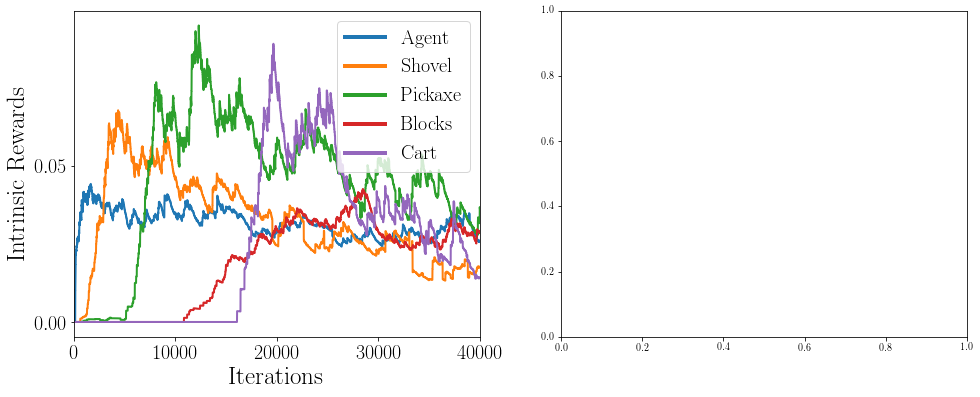

In [73]:

#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

def plot_interests(ax,subplot_nb,interest_dict, legend=True, labels=None, y_min=None, y_max=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=3)
    #colors = ['red','blue','green','magenta','black',
    #          'cyan','orange','powderblue','salmon','aqua','darkolivegreen',
    #         'orchid','indigo','saddlebrown','black', 'black']
    colors = {'pickaxe':u'#2ca02c' , 'shovel':u'#ff7f0e' ,
              'agent':u'#1f77b4' ,'cart':u'#9467bd' , 'block':u'#d62728' }
    labels = {'pickaxe':'Pickaxe' , 'shovel':'Shovel' ,
              'agent':'Agent' ,'cart':'Cart' , 'block':'Blocks' }
    #sorted(interest_dict.items())
    order = ['agent','shovel','pickaxe','block','cart']
    for i,name in enumerate(order):
        interests = interest_dict[name]
        if name[:-1] != "dist":
            if labels is not None:
                ax.plot(interests, color=colors[name], label=labels[name],linewidth=2.0)
            else:
                ax.plot(interests, color=colors[name], label=labels[name],linewidth=2.0)
    if subplot_nb == 0:
        ax.set_ylabel('Intrinsic Rewards', fontsize=25)
        
    ax.set_xlabel('Iterations', fontsize=25)
    if legend:
        leg = ax.legend(loc='auto',fontsize=20)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.tick_params(labelsize=20)
    if y_min is not None:
        ax.set_ylim(bottom=y_min,top=y_max)
    ax.set_xlim(left=0,right=40000)

short_labels = ['agent','bread','cart','distr 1','distr 2','distr 3', 'distr 4']

# Plot interest curves:

for i in range(18,22):
    f, (ax0, ax1) = plt.subplots(1,2,figsize=(16,6))
    ax = (ax0, ax1)
    ints = saves['amb'][i]['interests']
    plot_interests(ax[0],0,ints,legend=True,labels=None)
#plt.savefig("aaa_newold_interests_samebt.png", bbox_inches='tight')




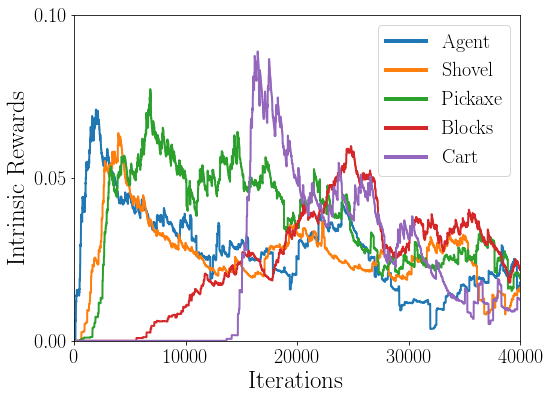

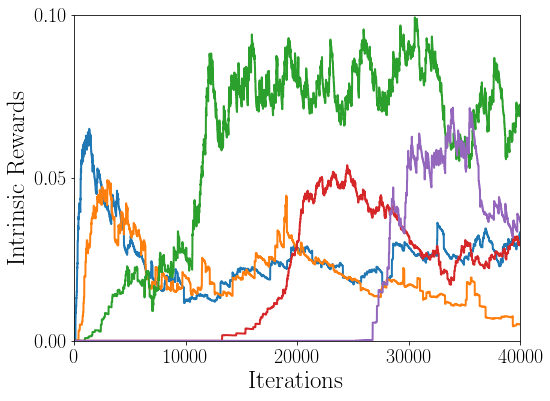

In [74]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# PLOT 2 SAMPLES OF AMB INTERESTS 6 14
f, ax = plt.subplots(1,1,figsize=(8,6))
ax = [ax]
for i,run_nb in enumerate([6]):
    ints = saves['amb'][run_nb]['interests']
    plot_interests(ax[i],i,ints,legend=True,labels=None, y_min=0, y_max=0.10)
plt.savefig("graphics/interest_curves_amb_mmc0.pdf", bbox_inches='tight')
plt.show()


f, ax = plt.subplots(1,1,figsize=(8,6))
ax = [ax]
for i,run_nb in enumerate([14]):
    ints = saves['amb'][run_nb]['interests']
    plot_interests(ax[i],i,ints,legend=False,labels=None, y_min=0, y_max=0.10)
plt.savefig("graphics/interest_curves_amb_mmc1.pdf", bbox_inches='tight')
plt.show()



In [ ]:
# Plot competence evolution for amb runs
f, (ax0, ax1) = plt.subplots(1,2,figsize=(20,4))
ax = (ax0, ax1)
m_names = ['pickaxe_end_pos']

for i in range(1):
    dists = {}
    for m_name in m_names:
        
        all_goals = saves[model_filenames[2]][1]['modules'][m_name].generated_goals
        all_outs = saves[model_filenames[2]][1]['modules'][m_name].observed_outcomes
        print(len(all_goals))
        print(len(all_outs))
        goals = np.array([all_goals[k-1] for k in range(5,len(all_goals),5)])
        outs = np.array([all_outs[k-1] for k in range(5,len(all_outs),5)])
        print(goals[-5:])
        print(outs[-5:])
        d = np.linalg.norm(goals - outs,axis=1)
        dists[m_name] = d
    #euc_d2 = np.linalg.norm(goals - outs,axis=1)
#     print(goals[0:3])
#     print(outs[0:3])
#     print(dists[0:3])
#     print(euc_d[0:3])
#     print(euc_d2[0:3])
#     print("h")
    plot_interests(ax[i],i,dists,legend=False,labels=None)

In [ ]:
# get interest curves names:
labels_2 = [s.replace('_',' ') for s in np.unique(saves[model_filenames[3]][0]['choosen_modules'])]

#labels = ['agent final position','bread final count','cart final position',
#               'fixed distractor 1 final position','fixed distractor 2 final position','moving distractor 1 final position', 'moving distractor 2 final position']
colors = ['red','blue','green','magenta','black','cyan','orange']

fig = pylab.figure()
figlegend = pylab.figure(figsize=(3.5,2))
ax = fig.add_subplot(111)
line_data = []
#for i in range(len(labels)):
#    line_data.append([range(10), pylab.randn(10), colors[i]])
print(len(labels_2))
if len(labels_2) == 3:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2])
elif len(labels_2) == 5:
    lines = ax.plot(range(10),pylab.randn(10),colors[0],
                    range(10),pylab.randn(10),colors[1],
                    range(10),pylab.randn(10),colors[2],
                    range(10),pylab.randn(10),colors[3],
                    range(10),pylab.randn(10),colors[4])
    
leg = figlegend.legend(lines, labels_2[:len(labels_2)], 'center')
for legobj in leg.legendHandles:
            legobj.set_linewidth(6.0)
        
figlegend.show()
figlegend.savefig('legend.png')

In [ ]:
# Time complexity analysis
for m_name, m_id in zip(model_full_names,model_filenames):
    print(m_id)
    b_k = saves[m_id][4]
    if 'runtimes' in b_k:
        rts = b_k['runtimes']
        #print(rts['produce'][-100:])
        plt.plot(rts['produce'],label='choose policy')
        plt.plot(rts['run'],label='run episode')
        plt.plot(rts['perceive'],label='add to memory')
        plt.legend()
        plt.ylabel('seconds')
        plt.xlabel('episodes')
    plt.savefig("time_complexity.png")
    plt.show()


In [178]:
# PLOT percentage of modules that moved specific objects
def plot_explo_per_module(ax, b_k, obj_labels, initial_pos, nb_steps, spaces=False, legend=False, title=None):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(labelsize=22)
    #first get list of idx where object moved for each module
    outcomes = []
    nb_outs = len(b_k[obj_labels[0]])
    nb_bt = nb_outs - len(b_k['choosen_modules'])
    #print(nb_bt)
    #print("adding {} bootstrap to module list".format(nb_bt))
    modules = ["random"]*nb_bt + b_k['choosen_modules']
    for i in range(len(b_k[obj_labels[0]])):
        outcomes.append([b_k[obj][i] for obj in obj_labels])
    #print(len(modules))
    #print(outcomes[100:150])
    #return
    
    
    dict_module_idx = {}
    for m_name in np.unique(modules):
        #first list -> when the module was choosen
        #second list -> when the module moved the object
        dict_module_idx[m_name] = [np.zeros(nb_outs), np.zeros(nb_outs)]
    for i, (outc, module_name) in enumerate(zip(outcomes, modules)):
        dict_module_idx[module_name][0][i] = 1
        if outc != initial_pos:
            dict_module_idx[module_name][1][i] = 1
    
    # now plot
    order = ['random','agent','pickaxe','block','cart']
    for m_name in order:
        info = dict_module_idx[m_name]
        #print(m_name)
        used = info[0]
        counts = info[1]
        d = []
        x = []
        for max_episodes in np.arange(step_size,nb_episodes+step_size,step_size):
            d.append(int((np.sum(counts[max_episodes-step_size:max_episodes])*100) / np.sum(used[max_episodes-step_size:max_episodes])))
            x.append(max_episodes)
        if spaces and m_name in spaces:
            if legend:
                label = object_names[m_name]
            else:
                label = None
            if m_name == 'block':
                print(d[-1])
            ax.plot(x,d, label=label,linewidth=2.0, color=object_colors[m_name])
    if legend: 
        leg = ax.legend(loc='auto',fontsize=30)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(4.0)
    ax.set_xlabel('Iterations', fontsize=30)
    ax.set_ylabel('Moving \%', fontsize=30)
    if title:
        ax.set_title(title, fontsize=30)
        
    ax.set_ylim(bottom=0,top=100)
    ax.set_xlim(left=0,right=40000)
        
    
   

PICKAXE
0
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


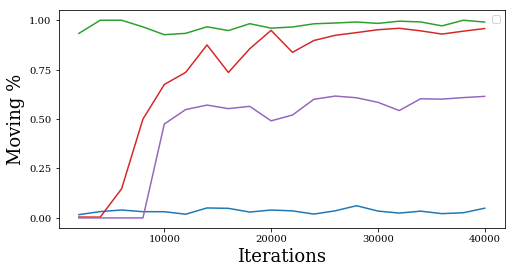

No handles with labels found to put in legend.


1
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


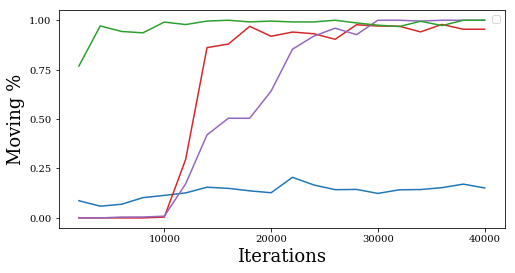

2
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


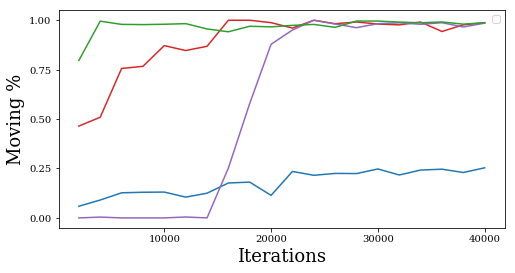

No handles with labels found to put in legend.


3
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


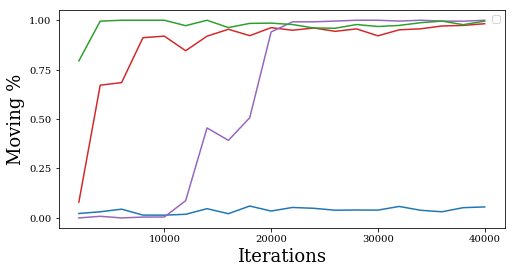

4
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


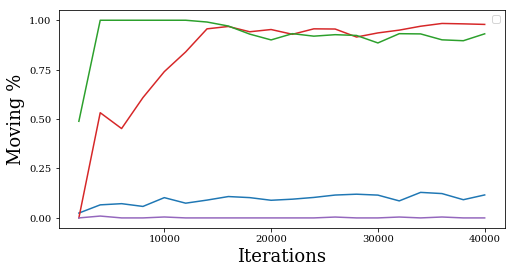

No handles with labels found to put in legend.


5
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


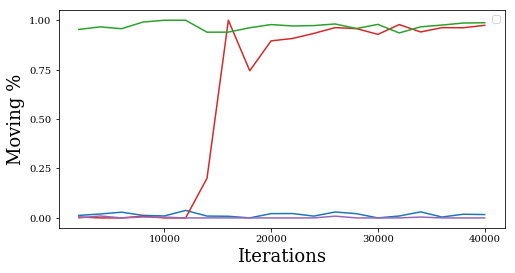

6
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


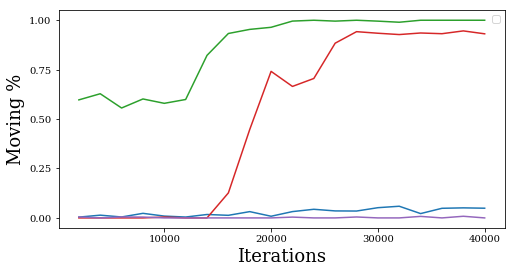

7


No handles with labels found to put in legend.


rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


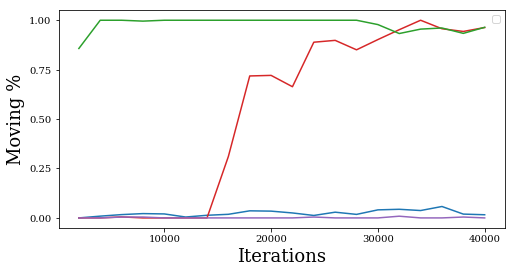

8
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


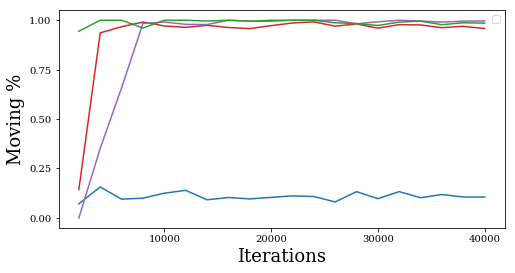

9


No handles with labels found to put in legend.


rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


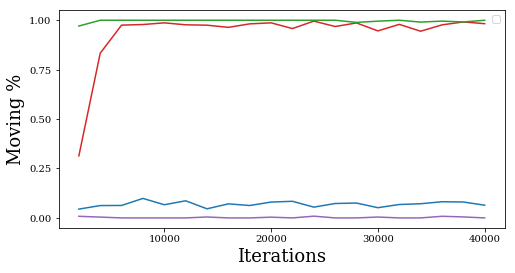

10
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


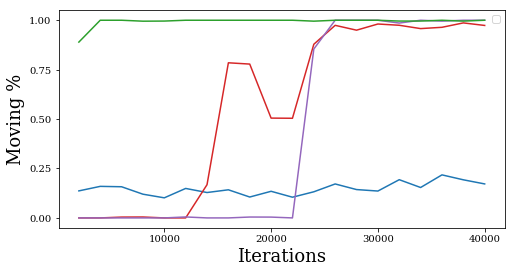

No handles with labels found to put in legend.


11
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


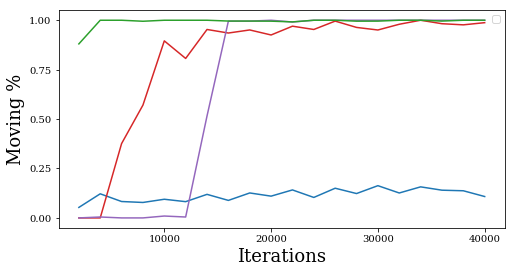

12
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


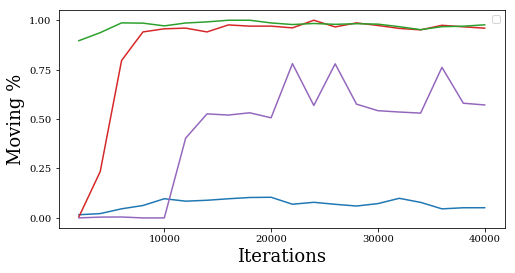

No handles with labels found to put in legend.


13
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


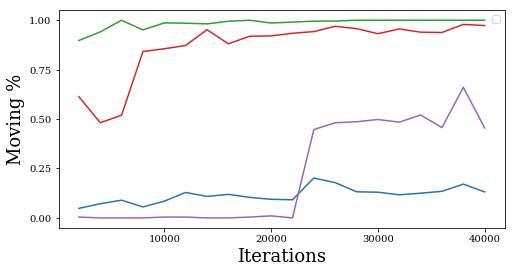

14
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


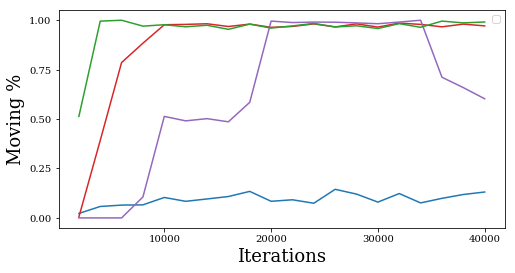

No handles with labels found to put in legend.


15
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


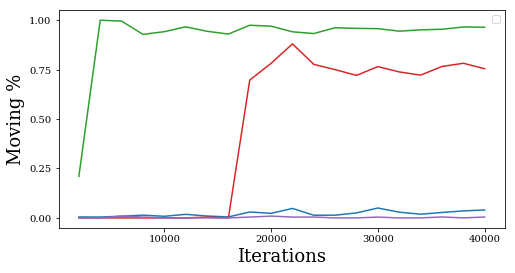

16
rmb


No handles with labels found to put in legend.


agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


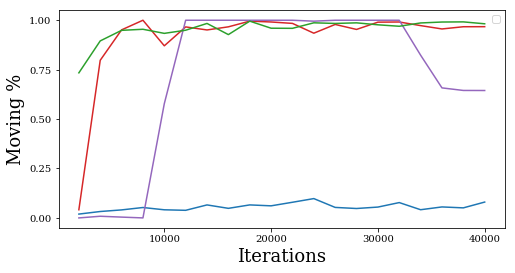

No handles with labels found to put in legend.


17
rmb
agent
block
cart
dist0
dist1
dist2
pickaxe
random
shovel


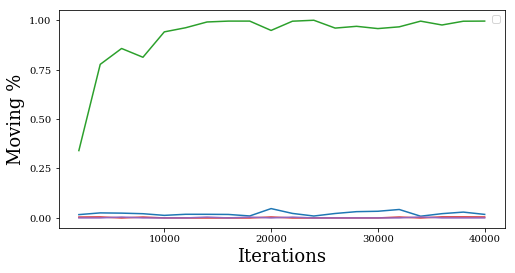

CART
0
rmb


KeyError: 'amb_rmb_comp/emmc3dfinal_rmb'

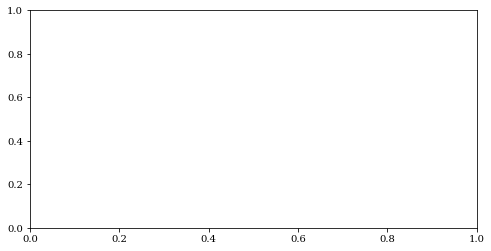

In [18]:
step_size = 2000
nb_steps = int(nb_episodes / step_size)
print('PICKAXE')
spaces = ['agent','pickaxe','block','cart']
for m_nb,m_id in enumerate(model_ids):
    if m_nb != 1:
        continue
    for i in range(nb_runs):
        print(i)
        f, ax = plt.subplots(1,1,figsize=(8,4))
        print(m_name)
        b_k = saves[m_id][i]
        plot_explo_per_module(ax, b_k, ['end_pickaxe_x', 'end_pickaxe_z'], [292.5, 436.5], nb_steps,
                             spaces=spaces)
        plt.legend()
        #plt.savefig("oldnew_explo_mods_pickaxe{}{}.png".format(m_name,i), bbox_inches='tight')
        plt.show()
# print('SHOVEL')        
# for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
#     if m_nb == -1:
#         continue
#     for i in range(nb_runs):
#         print(i)
#         f, ax = plt.subplots(1,1,figsize=(8,4))
#         print(m_name)
#         b_k = saves[m_id][i]
#         plot_explo_per_module(ax, b_k, ['end_shovel_x', 'end_shovel_z'], [290.5, 436.5], nb_steps)
#         plt.legend()
#         plt.savefig("oldnew_explo_mods_shovel{}{}.png".format(m_name,i), bbox_inches='tight')
#         plt.show()

# print('BLOCKS')
# for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
#     if m_nb == -1:
#         continue
#     for i in range(nb_runs):
#         print(i)
#         f, ax = plt.subplots(1,1,figsize=(8,4))
#         print(m_name)
#         b_k = saves[m_id][i]
#         initial_v = [-1.0, -1.0, -1.0, -1.0, -1.0]
#         labels = ['end_block_0','end_block_1','end_block_2', 'end_block_3','end_block_4']
#         plot_explo_per_module(ax, b_k, labels, initial_v, nb_steps)
#         plt.legend()
#         plt.savefig("oldnew_explo_mods_blocks{}{}.png".format(m_name,i), bbox_inches='tight')
#         plt.show()
        

print('CART')
for m_nb,(m_name, m_id) in enumerate(zip(model_full_names,model_filenames)):
    if m_nb != 1:
        continue
    for i in range(nb_runs):
        print(i)
        f, ax = plt.subplots(1,1,figsize=(8,4))
        print(m_name)
        b_k = saves[m_id][i]
        initial_v = [291.5]
        labels = ['end_cart_x']
        #plt.savefig("newnew_explo_mods_cart{}{}.png".format(m_name,i), bbox_inches='tight')
        plot_explo_per_module(ax, b_k, labels, initial_v, nb_steps)
        plt.legend()
        plt.show()

PICKAXE
BLOCKS
CART


/home/remy/.local/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "auto". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


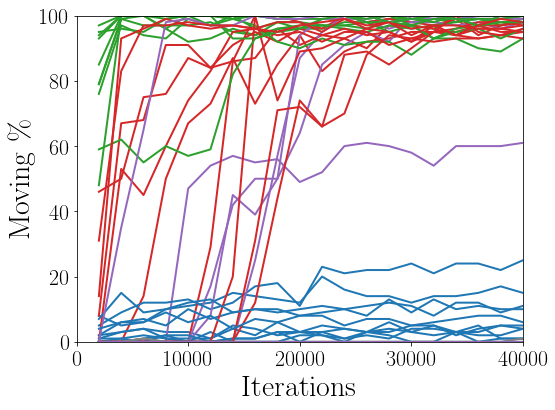

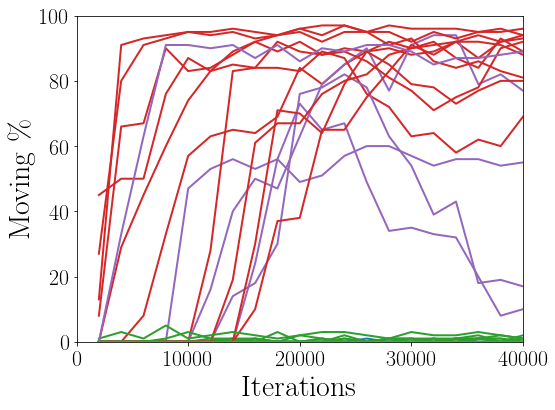

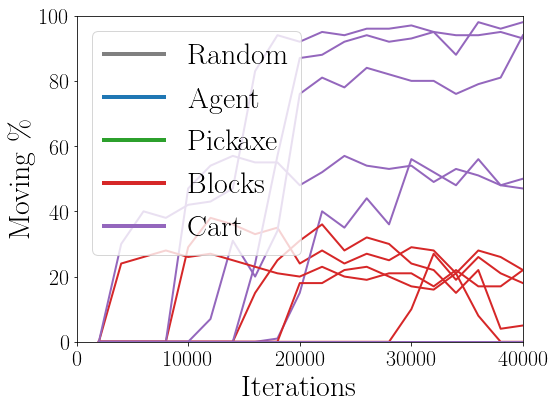

In [72]:
# ALL IN ONE PLOT
step_size = 2000
nb_steps = int(nb_episodes / step_size)
f, ax = plt.subplots(1,1,figsize=(8,6))
ax = [ax]
print('PICKAXE')       
spaces = ['agent', 'pickaxe', 'block', 'cart' ,'random']
nb_used_runs = 10
for m_nb,m_id in enumerate(model_ids):
    if m_nb != 1:
        continue
    for i in range(nb_used_runs):
        #print(i)
        #print(m_name)
        b_k = saves[m_id][i]
        if i == nb_used_runs - 1:
            legend = True
        else:
            legend = False
        plot_explo_per_module(ax[0], b_k, ['end_pickaxe_x', 'end_pickaxe_z'],
                              [292.5, 436.5], nb_steps, spaces=spaces, legend=False)
#plt.savefig("graphics/transfer_mmc_pickaxe.pdf".format(m_id,i), bbox_inches='tight')

f, ax = plt.subplots(1,1,figsize=(8,6))
ax = [ax]
print('BLOCKS')
for m_nb,m_id in enumerate(model_ids):
    if m_nb != 1:
        continue
    for i in range(nb_used_runs):
        #print(i)
        #print(m_name)
        b_k = saves[m_id][i]
        initial_v = [-1.0, -1.0, -1.0, -1.0, -1.0]
        labels = ['end_block_0','end_block_1','end_block_2', 'end_block_3','end_block_4']
        if i == nb_used_runs - 1:
            legend = True
        else:
            legend = False
        plot_explo_per_module(ax[0], b_k, labels, initial_v, nb_steps, spaces=spaces, legend=False)
#plt.savefig("graphics/transfer_mmc_blocks.pdf".format(m_id,i), bbox_inches='tight')

f, ax = plt.subplots(1,1,figsize=(8,6))
ax = [ax]
print('CART')
for m_nb,m_id in enumerate(model_ids):
    if m_nb != 1:
        continue
    for i in range(nb_used_runs):
        #print(i)
        #print(m_name)
        b_k = saves[m_id][i]
        initial_v = [291.5]
        labels = ['end_cart_x']
        if i == nb_used_runs - 1:
            legend = True
        else:
            legend = False
        plot_explo_per_module(ax[0], b_k, labels, initial_v, nb_steps, spaces=spaces, legend=legend)
#plt.savefig("graphics/transfer_mmc_cart.pdf".format(m_id,i), bbox_inches='tight')
plt.show()

/home/remy/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/remy/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/home/remy/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/remy/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', o

Line Solution is y = -1.2716763005780343x + -0.5580924855491327
Line Solution is y = 1.271676300578035x + -0.34190751445086703
['cart_goals', 'cart_outcomes', 'cart_errors']
-0.8635
20
-0.48290000000000044
20
-0.10230000000000083
20
0.4685999999999986
20
0.6934999999999982
20


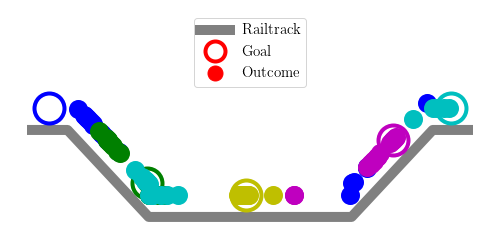

In [183]:
# PLOT A FEW EXAMPLES OF CART GOALS AND OUTCOMES
from numpy import ones,vstack
from numpy.linalg import lstsq

#1- DRAW THE ENV
f, ax = plt.subplots(1,1,figsize=(8,4))
x_min = -0.95
x_max = 0.78
scale = 0.5
y_min=0.1 * scale
y_max=0.9 * scale
ax.set_xlim(xmin=x_min,xmax=x_max)
ax.set_ylim(ymin=0,ymax=1)

step = np.abs((x_min - x_max) /11)
#print(step)
linewidth = 10
linestyle = '-'
color = 'grey'
c0, c1, c2, c3 = x_min+step, x_min+(3*step), x_max-step, x_max-(3*step)

# ax.plot([x_min, x_min+step], [y_max, y_max], color=color, linestyle=linestyle, linewidth=linewidth)
# ax.plot([c0,c1], [y_max, y_min], color=color, linestyle=linestyle, linewidth=linewidth)
# line_coef = (y_min - y_max) / (x_min - x_max)
# print(line_coef)
# ax.plot([x_min+(3*step), x_max-(3*step)], [y_min, y_min], color=color, linestyle=linestyle, linewidth=linewidth)

# ax.plot([x_max, x_max-step], [y_max, y_max], color=color, linestyle=linestyle, linewidth=linewidth)
# ax.plot([c2,c3], [y_max, y_min], color=color, linestyle=linestyle, linewidth=linewidth)
ax.plot([x_min, x_min+step,c1,c3,c2,x_max],
        [y_max, y_max, y_min, y_min, y_max, y_max],
        color=color, linestyle=linestyle, linewidth=linewidth,
       label='Railtrack')
points = [(c0,y_max),(c1,y_min)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m0, c0 = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m0,c=c0))

points = [(c2,y_max),(c3,y_min)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m1, c1 = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m1,c=c1))

#2- print goals from an amb run
t_data = pickle.load(open("run_saves/emmc3d_amb_1_slow25crocustest.pickle","rb"))
print(list(t_data))
def plot_point(p, markersize=50, color='r.', fillstyle='full', m_width=4):
    if (p <= x_min+step) or (p >= x_max-step): #left or right
        ax.plot(p, y_max+0.1, color, fillstyle=fillstyle, markersize=markersize, markeredgewidth=m_width)
    elif (p >= x_min+3*step) and (p <= x_max-3*step): #middle
        ax.plot(p, y_min+0.1, color, fillstyle=fillstyle, markersize=markersize, markeredgewidth=m_width)
    elif (p >= x_min+step) and (p <= x_min+3*step): #left slope
        ax.plot(p, p*m0+c0 +0.15, color, fillstyle=fillstyle, markersize=markersize, markeredgewidth=m_width)
    elif (p >= x_max-3*step) and (p <= x_max-step):
        ax.plot(p, p*m1+c1 +0.15, color,
                fillstyle=fillstyle, markersize=markersize, markeredgewidth=m_width)
goal_nbs = [5,27,49,82,95]
#goal_nbs = [0,1,2,3,4]
colors=['b.','g.','y.','m.','c.']
cpt = 0
for i,(o,g_nb, err) in enumerate(zip(t_data['cart_outcomes'],goal_nbs, t_data['cart_errors'])):
    g = t_data['cart_goals'][g_nb]
    if (g_nb in goal_nbs):
        print(g)
        plot_point(g, color=colors[cpt], fillstyle='none', markersize=60)
        print(len(o))
        for out in o:
            plot_point(out,color=colors[cpt], markersize=30)
        cpt+=1
#adding legend
ax.plot(-5,0,'r.', fillstyle='none', markersize=40, markeredgewidth=4, label='Goal')
ax.plot(-5,0,'r.', markersize=30, label='Outcome')
ax.axis('off')
plt.legend(loc='upper center', fontsize=15)
#plt.savefig("graphics/stochasticity_crocus25_amb_cart_competence.pdf", bbox_inches='tight')
plt.show()

In [271]:
import scipy.stats as ss
#PROCESS TEST DATA

#SUCCESS FOR CART GOALS
#['cart_errors', 'pickaxe_outcomes', 'cart_goals', 'pickaxe_errors', 'cart_outcomes', 'pickaxe_goals']
cart_err_tol = 0.05
tested_models = ['amb','rmb']
m_success_cart = dict()
for m_name in tested_models: 
    print(m_name)
    m_success_cart[m_name] = []
    for r in range(nb_runs):
        d = test_saves[m_name][r]
        r_success = 0
        for g,outs,errs in zip(d['cart_goals'], d['cart_outcomes'], d['cart_errors']):
            #print("{}".format(min(errs)))
            #if min(errs) <= cart_err_tol:
            #    r_success += 1
            for err in errs:
                if err <= cart_err_tol:
                    r_success += 1
        m_success_cart[m_name].append((r_success *100) / (len(d['cart_goals'])*10))
    print("{} mean: {}".format(m_success_cart[m_name],np.mean(m_success_cart[m_name])))

#SUCCESS FOR PICKAXE GOALS
pickaxe_err_tol = 0.05
m_success_pickaxe = dict()
for m_name in tested_models:
    print(m_name)
    m_success_pickaxe[m_name] = []
    for r in range(nb_runs):
        d = test_saves[m_name][r]
        r_success = 0
        for g,out,err in zip(d['pickaxe_goals'], d['pickaxe_outcomes'], d['pickaxe_errors']):
            #print("{}".format(err))
            if np.mean(err) <= pickaxe_err_tol:
                r_success += 1
        m_success_pickaxe[m_name].append((r_success *100) / len(d['pickaxe_goals']))
    print("{} mean: {} ".format(m_success_pickaxe[m_name],np.mean(m_success_pickaxe[m_name])))

# WELCH TESTS   
print('welch {}'.format(ss.ttest_ind(m_success_cart['amb'], m_success_cart['rmb'], equal_var=False)))
print('welch {}'.format(ss.ttest_ind(m_success_pickaxe['amb'], m_success_pickaxe['rmb'], equal_var=False)))


amb
[9.4, 29.8, 6.0, 28.9, 6.0, 6.0, 21.3, 10.8, 22.6, 8.9, 9.2, 16.4, 11.7, 20.9, 15.8, 6.0, 18.9, 6.0, 13.1, 11.0, 6.1, 8.7, 14.7, 42.5, 7.8, 7.4, 6.0] mean: 13.774074074074074
rmb
[18.0, 19.2, 14.7, 13.4, 6.0, 6.0, 6.0, 6.0, 16.5, 6.0, 16.7, 9.5, 11.5, 11.3, 11.4, 6.0, 14.7, 6.0, 14.0, 11.0, 7.2, 6.0, 9.1, 32.6, 8.0, 6.0, 6.2] mean: 11.074074074074073
amb
[50.875, 45.25, 44.0, 39.125, 46.625, 17.125, 46.625, 45.0, 47.0, 58.625, 44.375, 36.5, 37.25, 50.25, 47.625, 52.125, 45.125, 42.75, 47.5, 49.25, 48.125, 43.875, 41.375, 53.5, 41.125, 40.875, 43.875] mean: 44.657407407407405 
rmb
[42.5, 54.125, 43.375, 34.375, 39.5, 40.125, 36.375, 37.5, 45.75, 41.375, 41.125, 46.5, 36.5, 35.625, 48.625, 35.5, 39.75, 19.125, 42.125, 26.125, 46.125, 39.625, 37.25, 40.5, 32.875, 34.5, 37.625] mean: 39.05555555555556 
welch Ttest_indResult(statistic=-1.2831298174930714, pvalue=0.20594775563202392)
welch Ttest_indResult(statistic=2.8942972667503546, pvalue=0.005553148411495844)
